## INFOSYS722_BDAS_ASSIGNMENT_LORRAINE ZHOU

In [109]:
# Import the relevant packages.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('INFOSYS722').getOrCreate()
import pandas as pd
sc = spark.sparkContext

In [110]:
# Each column has a header in this dataset, its done by stating header=True.
df = spark.read.csv('BostonCrime2.0.csv',header=True,inferSchema=True)

# Data Exploration

In [111]:
# The show method allows to visualise DataFrames in a tabular format. 
df.show()

+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|2015|   10| Saturday|  13|  Part Two|   BERKELEY ST|       N|
|             6|       1102|            

In [112]:
# Print schema allows to visualise the data structure at a high level. 
df.printSchema()

root
 |-- INCIDENTNUMBER: integer (nullable = true)
 |-- OFFENSECODE: integer (nullable = true)
 |-- OFFENSECODEGROUP: string (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAYOFWEEK: string (nullable = true)
 |-- HOUR: integer (nullable = true)
 |-- UCRPART: string (nullable = true)
 |-- STREET: string (nullable = true)
 |-- SHOOTING: string (nullable = true)



In [113]:
# Use head to print a specific amount of rows, so I can get a better understanding of the data points. 
print(df.head(1))

[Row(INCIDENTNUMBER=1, OFFENSECODE=1102, OFFENSECODEGROUP='Fraud', DISTRICT='D4', YEAR=2015, MONTH=12, DAYOFWEEK='Sunday', HOUR=14, UCRPART='Part Two', STREET='WESTLAND AVE', SHOOTING='N')]


In [114]:
# Use the describe method get some general statistics on the data too. 
df.describe().show()

+-------+------------------+------------------+------------------+--------+------------------+-----------------+---------+-----------------+--------+---------+--------+
|summary|    INCIDENTNUMBER|       OFFENSECODE|  OFFENSECODEGROUP|DISTRICT|              YEAR|            MONTH|DAYOFWEEK|             HOUR| UCRPART|   STREET|SHOOTING|
+-------+------------------+------------------+------------------+--------+------------------+-----------------+---------+-----------------+--------+---------+--------+
|  count|               800|               800|               800|     772|               800|              800|      800|              800|     800|      783|     800|
|   mean|             400.5|        1949.24875|              null|    null|        2016.50375|           8.2025|     null|            15.49|    null|     null|    null|
| stddev|231.08440016582685|1095.3304308812276|              null|    null|1.1209623692572204|2.677770867909777|     null|6.011661591762074|    null|     n

In [115]:
# Select the columns that are integers, and use the describe method again,it shows the mean, standard deviation, min and max. 
# My dataset is categorical data rather than numerical, therfore this step is actually not applicable to my dataset,however, it gives me more understanding on deal with the numerical problem in the future.
df.select('YEAR','MONTH','HOUR').describe().show()

+-------+------------------+-----------------+-----------------+
|summary|              YEAR|            MONTH|             HOUR|
+-------+------------------+-----------------+-----------------+
|  count|               800|              800|              800|
|   mean|        2016.50375|           8.2025|            15.49|
| stddev|1.1209623692572204|2.677770867909777|6.011661591762074|
|    min|              2015|                1|                1|
|    max|              2018|               12|               24|
+-------+------------------+-----------------+-----------------+



In [116]:
# Select all columns of the dataset, describe and show the detailed information.
df.select('INCIDENTNUMBER','OFFENSECODE','OFFENSECODEGROUP','DISTRICT','YEAR','MONTH','DAYOFWEEK','HOUR','UCRPART','STREET','SHOOTING').describe().show()

+-------+------------------+------------------+------------------+--------+------------------+-----------------+---------+-----------------+--------+---------+--------+
|summary|    INCIDENTNUMBER|       OFFENSECODE|  OFFENSECODEGROUP|DISTRICT|              YEAR|            MONTH|DAYOFWEEK|             HOUR| UCRPART|   STREET|SHOOTING|
+-------+------------------+------------------+------------------+--------+------------------+-----------------+---------+-----------------+--------+---------+--------+
|  count|               800|               800|               800|     772|               800|              800|      800|              800|     800|      783|     800|
|   mean|             400.5|        1949.24875|              null|    null|        2016.50375|           8.2025|     null|            15.49|    null|     null|    null|
| stddev|231.08440016582685|1095.3304308812276|              null|    null|1.1209623692572204|2.677770867909777|     null|6.011661591762074|    null|     n

In [159]:
df1 = pd.read_csv('BostonCrime2.0.csv')

In [160]:
print(df1.shape)

(800, 11)


In [161]:
print(df1.columns)

Index(['INCIDENTNUMBER', 'OFFENSECODE', 'OFFENSECODEGROUP', 'DISTRICT', 'YEAR',
       'MONTH', 'DAYOFWEEK', 'HOUR', 'UCRPART', 'STREET', 'SHOOTING'],
      dtype='object')


In [163]:
df1.describe()

,INCIDENTNUMBER,OFFENSECODE,YEAR,MONTH,HOUR
count,800.0000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,1949.248750,2016.503750,8.202500,15.490000
std,231.0844,1095.330431,1.120962,2.677771,6.011662
min,1.0000,301.000000,2015.000000,1.000000,1.000000
25%,200.7500,1102.000000,2015.750000,7.000000,12.000000
50%,400.5000,1402.000000,2017.000000,8.000000,14.000000
75%,600.2500,3115.000000,2018.000000,10.000000,24.000000
max,800.0000,3831.000000,2018.000000,12.000000,24.000000


In [164]:
df1.head(20)

,INCIDENTNUMBER,OFFENSECODE,OFFENSECODEGROUP,DISTRICT,YEAR,MONTH,DAYOFWEEK,HOUR,UCRPART,STREET,SHOOTING
0,1,1102,Fraud,D4,2015,12,Sunday,14,Part Two,WESTLAND AVE,N
1,2,619,Larceny,D4,2015,12,Sunday,14,Part One,WESTLAND AVE,N
2,3,1107,Fraud,E18,2015,7,Wednesday,12,Part Two,OAKCREST RD,N
3,4,1107,Fraud,C6,2015,11,Thursday,8,Part Two,E FOURTH ST,N
4,5,2647,Other,D4,2015,10,Saturday,13,Part Two,BERKELEY ST,N
5,6,1102,Fraud,D14,2015,9,Tuesday,11,Part Two,ALLSTON ST,N
6,7,3201,Property Lost,C11,2015,8,Thursday,8,Part Three,EDWIN ST,N
7,8,1102,Fraud,C11,2015,10,Wednesday,12,Part Two,WASHINGTON ST,N
8,9,1102,Fraud,C11,2015,8,Saturday,6,Part Two,DITSON ST,N
9,10,1107,Fraud,A1,2015,8,Saturday,15,Part Two,WASHINGTON ST,N


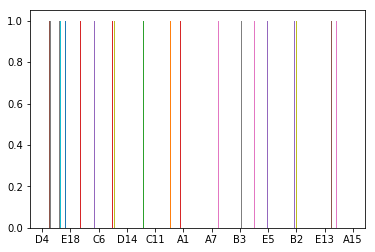

In [165]:
plt.hist(df1["DISTRICT"])
plt.show()

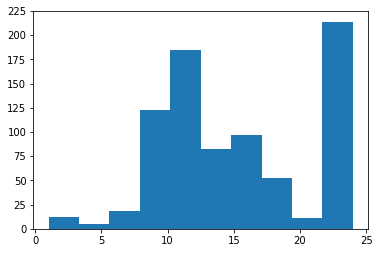

In [166]:
plt.hist(df1["HOUR"])
plt.show()

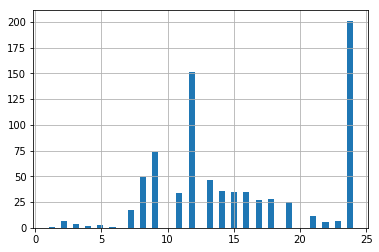

In [167]:
df1['HOUR'].hist(bins=50)

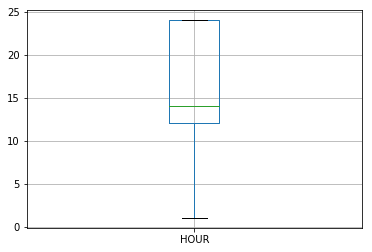

In [168]:
df1.boxplot(column='HOUR')

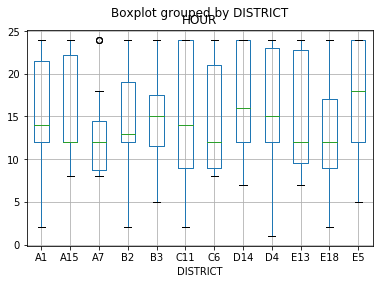

In [169]:
df1.boxplot(column='HOUR',by='DISTRICT')

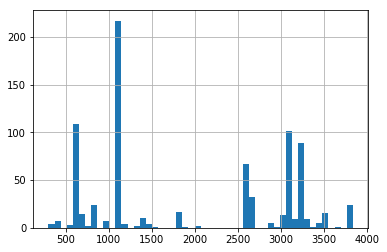

In [170]:
df1['OFFENSECODE'].hist(bins=50)

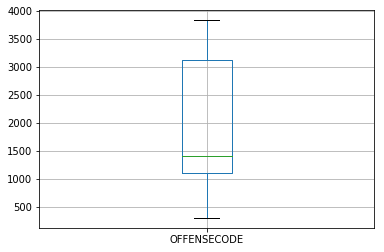

In [171]:
df1.boxplot(column='OFFENSECODE')

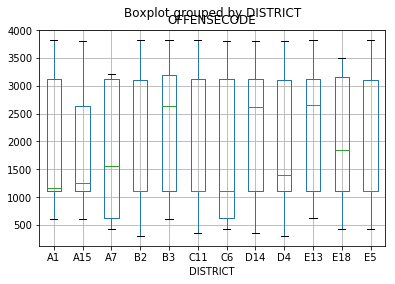

In [172]:
df1.boxplot(column='OFFENSECODE', by= 'DISTRICT')

2      15
1      17
4      17
3      20
5      23
6      56
8      56
9      80
11     86
10     89
12    109
7     232
Name: MONTH, dtype: int64


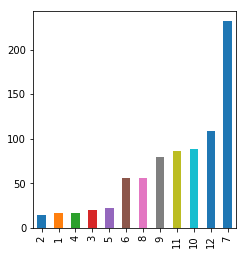

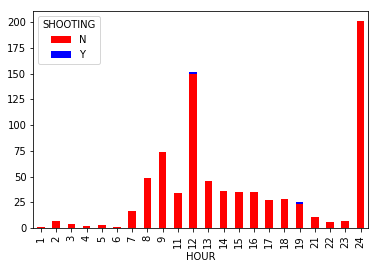

In [173]:
temp1 = df1['MONTH'].value_counts(ascending=True)
print (temp1)

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(121)
temp1.plot(kind='bar')

temp2=pd.crosstab(df1['HOUR'],df1['SHOOTING'])
temp2.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

# Data Manipulation

Using Select

In [117]:
# Select the MONTH column and assign it to a variable. 
mon_col = df.select('MONTH')

# Use the show method on that variable.
mon_col.show()

+-----+
|MONTH|
+-----+
|   12|
|   12|
|    7|
|   11|
|   10|
|    9|
|    8|
|   10|
|    8|
|    8|
|    7|
|   11|
|   12|
|    7|
|    9|
|    9|
|   10|
|    7|
|    8|
|   10|
+-----+
only showing top 20 rows



Using Filter

In [118]:
# Try out some additional DataFrame methods by using filter.
# Using filter to identify crime occurs after June.
df.filter("MONTH > 6").show()

# Use more advanced filters to see the crime occurs with corresponding years.
df.filter("MONTH > 6").select('YEAR','MONTH').show()

+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|2015|   10| Saturday|  13|  Part Two|   BERKELEY ST|       N|
|             6|       1102|            

In [119]:
# Use this filter to see the crime occurs in June.
df.filter(df.MONTH == '6').show()

+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|              STREET|SHOOTING|
+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------------+--------+
|            38|       2629|          Harassment|     C11|2015|    6|   Monday|  24|  Part Two|        MELBOURNE ST|       N|
|            93|       3018|  Medical Assistance|      C6|2015|    6|   Sunday|  12|Part Three|      NEW SUDBURY ST|       N|
|            97|       1102|               Fraud|      D4|2015|    6|   Friday|  17|  Part Two|            OPERA PL|       N|
|           123|       3501|Missing Person Re...|      B3|2015|    6| Saturday|  16|Part Three|         DRUMMOND ST|       N|
|           124|       3502|Missing Person Lo...|      B3|2015|    6| Saturday|  16|Part Three|         DRUMMOND ST|  

In [120]:
# Use this filter to see the crime occurs at 12.
df.filter("HOUR='12'").show()

+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|              STREET|SHOOTING|
+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------------+--------+
|             3|       1107|               Fraud|     E18|2015|    7|Wednesday|  12|  Part Two|         OAKCREST RD|       N|
|             8|       1102|               Fraud|     C11|2015|   10|Wednesday|  12|  Part Two|       WASHINGTON ST|       N|
|            23|       3110|Police Service In...|      E5|2015|    9|  Tuesday|  12|Part Three|          DENTON TER|       N|
|            32|       1102|               Fraud|      A1|2015|   10|  Tuesday|  12|  Part Two|            COURT ST|       N|
|            33|       1109|               Fraud|      B2|2015|   11| Thursday|  12|  Part Two|       BLUE HILL AVE|  

In [121]:
# Use multiple condition in the filters to see those crime that occurred after June and before 12pm. 
df.filter("MONTH > 6 AND HOUR < 12").select('INCIDENTNUMBER','MONTH','HOUR').show()

+--------------+-----+----+
|INCIDENTNUMBER|MONTH|HOUR|
+--------------+-----+----+
|             4|   11|   8|
|             6|    9|  11|
|             7|    8|   8|
|             9|    8|   6|
|            12|   11|  11|
|            13|   12|   4|
|            14|    7|   8|
|            16|    9|   9|
|            17|   10|   8|
|            19|    8|   9|
|            21|   12|   9|
|            25|    9|   9|
|            26|   10|   9|
|            27|    8|   9|
|            28|    7|   2|
|            29|   10|   9|
|            31|   11|   9|
|            43|    9|   7|
|            45|    8|   9|
|            55|    8|   9|
+--------------+-----+----+
only showing top 20 rows



Mutate, or creating new columns

In [122]:
# Only boolean type, string is not applicable, and my dataset is categorical data rather than numerical, 
# Therfore this step is just tried to use this functiton by YEARMONTH, the result is unnecessary here.
df.withColumn('YEARMONTH', df.YEAR*df.MONTH).show()

+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+---------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|YEARMONTH|
+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+---------+
|             1|       1102|               Fraud|      D4|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|    24180|
|             2|        619|             Larceny|      D4|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|    24180|
|             3|       1107|               Fraud|     E18|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|    14105|
|             4|       1107|               Fraud|      C6|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|    22165|
|             5|       2647|               Other|      D4|2015|   10| Saturday|  13|  Part

Summarize and group by data

In [123]:
# Group by MONTH, and the average Offensecode, Year, Month and Hour was calculated.
# mean() automatically filters out any non-numeric features.
df.groupBy('MONTH').mean().show()

+-----+-------------------+------------------+------------------+----------+------------------+
|MONTH|avg(INCIDENTNUMBER)|  avg(OFFENSECODE)|         avg(YEAR)|avg(MONTH)|         avg(HOUR)|
+-----+-------------------+------------------+------------------+----------+------------------+
|   12|  298.0091743119266| 1735.697247706422|2015.9816513761468|      12.0|15.458715596330276|
|    1| 339.05882352941177|1959.2941176470588|2016.4117647058824|       1.0|17.529411764705884|
|    6| 387.76785714285717| 2149.214285714286|            2016.5|       6.0|              14.5|
|    3|              403.6|           1981.25|            2016.5|       3.0|             15.35|
|    5|  404.9130434782609|2087.1739130434785|2016.5652173913043|       5.0|13.695652173913043|
|    9|            275.175|         1879.8125|         2015.8375|       9.0|             16.45|
|    4|  361.1764705882353|1483.6470588235295|2016.3529411764705|       4.0|15.647058823529411|
|    8| 267.67857142857144| 2092.2142857

In [124]:
# Group by STREET, and the average Offensecode, Year, Month and Hour was calculated.
# mean() automatically filters out any non-numeric features.
df.groupBy('STREET').mean().show()

+--------------------+-------------------+------------------+------------------+------------------+------------------+
|              STREET|avg(INCIDENTNUMBER)|  avg(OFFENSECODE)|         avg(YEAR)|        avg(MONTH)|         avg(HOUR)|
+--------------------+-------------------+------------------+------------------+------------------+------------------+
|      GEORGETOWNE DR|               76.0|             619.0|            2015.0|              12.0|              14.0|
|        CLARENDON ST|               99.0|            1102.0|            2015.0|               9.0|              12.0|
|      DORCHESTER AVE| 290.44444444444446|1804.4444444444443| 2016.111111111111|10.222222222222221|16.333333333333332|
|        HOLLANDER ST|              627.0|            1402.0|            2018.0|               7.0|               5.0|
|          GENEVA AVE|              227.6|            2232.4|            2015.6|              11.4|               8.6|
|         BRADWOOD ST|              491.0|      

# Data Cleaning

In [125]:
# Visually inspect the data. There are some nulls in the DISTRICT and STREET column. 
df.show()

# See how many rows of data the dataset originally has.
print("Total data points:", df.count())

+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|2015|   10| Saturday|  13|  Part Two|   BERKELEY ST|       N|
|             6|       1102|            

Dropping Rows - Missing Data Point

In [126]:
# Drop the rows with missing data.
# 'na' stands for Not Available. Using na, then use drop. 
dropped_df = df.na.drop()
dropped_df.show()

print("Total data points:", dropped_df.count())

+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|2015|   10| Saturday|  13|  Part Two|   BERKELEY ST|       N|
|             6|       1102|            

In [127]:
df = df.na.drop()

# After using show, you'll find that the rows with the null values are gone. 
df.show()

# See how many rows of data have now. 
print("Total data points:", df.count())

+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|2015|   10| Saturday|  13|  Part Two|   BERKELEY ST|       N|
|             6|       1102|            

# Logistic Regression 

In [128]:
# Import the relevant packages.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('INFOSYS722').getOrCreate()

from pyspark.ml.classification import LogisticRegression

In [129]:
# Print schema of columns to view the data's feature.
df.printSchema()
print(df.columns)

root
 |-- INCIDENTNUMBER: integer (nullable = true)
 |-- OFFENSECODE: integer (nullable = true)
 |-- OFFENSECODEGROUP: string (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAYOFWEEK: string (nullable = true)
 |-- HOUR: integer (nullable = true)
 |-- UCRPART: string (nullable = true)
 |-- STREET: string (nullable = true)
 |-- SHOOTING: string (nullable = true)

['INCIDENTNUMBER', 'OFFENSECODE', 'OFFENSECODEGROUP', 'DISTRICT', 'YEAR', 'MONTH', 'DAYOFWEEK', 'HOUR', 'UCRPART', 'STREET', 'SHOOTING']


Utilising Pandas

In [130]:
# Import pandas.
import pandas as pd

# Take the first five rows of data, and visualise.
pd.DataFrame(df.take(5), columns=df.columns)

,INCIDENTNUMBER,OFFENSECODE,OFFENSECODEGROUP,DISTRICT,YEAR,MONTH,DAYOFWEEK,HOUR,UCRPART,STREET,SHOOTING
0,1,1102,Fraud,D4,2015,12,Sunday,14,Part Two,WESTLAND AVE,N
1,2,619,Larceny,D4,2015,12,Sunday,14,Part One,WESTLAND AVE,N
2,3,1107,Fraud,E18,2015,7,Wednesday,12,Part Two,OAKCREST RD,N
3,4,1107,Fraud,C6,2015,11,Thursday,8,Part Two,E FOURTH ST,N
4,5,2647,Other,D4,2015,10,Saturday,13,Part Two,BERKELEY ST,N


In [131]:
# To visualise the first five columns, simply add transpose. 
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
INCIDENTNUMBER,1,2,3,4,5
OFFENSECODE,1102,619,1107,1107,2647
OFFENSECODEGROUP,Fraud,Larceny,Fraud,Fraud,Other
DISTRICT,D4,D4,E18,C6,D4
YEAR,2015,2015,2015,2015,2015
MONTH,12,12,7,11,10
DAYOFWEEK,Sunday,Sunday,Wednesday,Thursday,Saturday
HOUR,14,14,12,8,13
UCRPART,Part Two,Part One,Part Two,Part Two,Part Two
STREET,WESTLAND AVE,WESTLAND AVE,OAKCREST RD,E FOURTH ST,BERKELEY ST


In [132]:
# Use group by and count to find out how many data points have for each class in the predictor. 
df.groupby('SHOOTING').count().toPandas()

,SHOOTING,count
0,Y,3
1,N,766


Summary statistics for numeric variables

In [133]:
# Using a for loop to find all columns that belong to the integer data type. 
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']

# Selecting the numeric features, generating summary statistics, and converting to a Pandas DataFrame.
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
INCIDENTNUMBER,769,393.629388816645,229.57054385073621,1,800
OFFENSECODE,769,1940.8673602080623,1089.8672083620763,301,3831
YEAR,769,2016.4655396618987,1.1118073692673838,2015,2018
MONTH,769,8.263979193758127,2.691472892841368,1,12
HOUR,769,15.47074122236671,6.059770828731808,1,24


Correlations

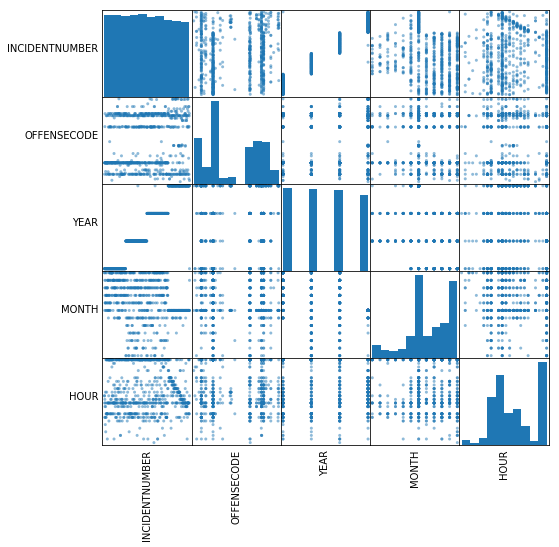

In [134]:
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

Select useful columns

In [135]:
# Now that I've carried out some basic data exploration, I will select the relevant features. 
# IncidentNumber,ReportingArea and UCRPart have been excluded as they're irrelevant.
df = df.select('OFFENSECODE','DISTRICT','YEAR','MONTH','DAYOFWEEK','HOUR','STREET','SHOOTING')
df.printSchema()

root
 |-- OFFENSECODE: integer (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAYOFWEEK: string (nullable = true)
 |-- HOUR: integer (nullable = true)
 |-- STREET: string (nullable = true)
 |-- SHOOTING: string (nullable = true)



Working with Categorical Columns


In [136]:
# Import the relevant packages.
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

# First create a string indexer which converts every string into a number.
# A number will be assigned to every category in the column.
DISTRICT_indexer = StringIndexer(inputCol='DISTRICT',outputCol='DISTRICTIndex')
DAYOFWEEK_indexer = StringIndexer(inputCol='DAYOFWEEK',outputCol='DAYOFWEEKIndex')
STREET_indexer = StringIndexer(inputCol='STREET',outputCol='STREETIndex')
SHOOTING_indexer = StringIndexer(inputCol='SHOOTING',outputCol='label')

# Now one hot encode these numbers. This converts the various outputs into a single vector.
# Multiple columns are collapsed into one. 
# This makes it easier to process when contains multiple classes.
DISTRICT_encoder = OneHotEncoder(inputCol='DISTRICTIndex',outputCol='DISTRICTVec')
DAYOFWEEK_encoder = OneHotEncoder(inputCol='DAYOFWEEKIndex',outputCol='DAYOFWEEKVec')
STREET_encoder = OneHotEncoder(inputCol='STREETIndex',outputCol='STREETVec')

# And finally, using vector assembler to turn all of these columns into one column (named features).
assembler = VectorAssembler(inputCols=['DISTRICTVec','DAYOFWEEKVec','STREETVec',
                                       'OFFENSECODE','YEAR','MONTH','HOUR'], outputCol="features")

Pipelines

In [137]:
# Import the relevant packages.
from pyspark.ml import Pipeline

# Use pipelines which allow to specify a set of steps for everything to occur, it's essentially sequential to the above.
pipeline = Pipeline(stages=[DISTRICT_indexer, DAYOFWEEK_indexer, STREET_indexer, SHOOTING_indexer,
                            DISTRICT_encoder, DAYOFWEEK_encoder, STREET_encoder, assembler])

# Now apply it to the DataFrame.
pipeline_model = pipeline.fit(df)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(df)

# Remove all variables other than features and label. 
pipe_df = pipe_df.select('label', 'features')

# Logistic Regression Model

Train and Test

In [138]:
from pyspark.ml.classification import LogisticRegression

# Split the data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr = LogisticRegression(featuresCol='features',labelCol='label', maxIter=10)

# Fit the model.
lrModel = lr.fit(train_data)

# And evaluate the model using the test data.
results = lrModel.transform(test_data)

Training Dataset Count: 537
Test Dataset Count: 232


In [139]:
# Make predictions on the test set.
predictions = lrModel.transform(test_data)
predictions.select( 'label', 'features', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+--------------------+--------------------+----------+--------------------+
|label|            features|       rawPrediction|prediction|         probability|
+-----+--------------------+--------------------+----------+--------------------+
|  0.0|(456,[0,11,17,452...|[5.30652990840763...|       0.0|[0.99506536592603...|
|  0.0|(456,[0,11,31,452...|[5.30482378614684...|       0.0|[0.99505698130214...|
|  0.0|(456,[0,11,52,452...|[5.30338936038319...|       0.0|[0.99504992094420...|
|  0.0|(456,[0,11,60,452...|[5.30502877050964...|       0.0|[0.99505798943289...|
|  0.0|(456,[0,11,60,452...|[5.30460445448892...|       0.0|[0.99505590238353...|
|  0.0|(456,[0,11,148,45...|[5.30402197625744...|       0.0|[0.99505303596597...|
|  0.0|(456,[0,11,226,45...|[5.30442052608321...|       0.0|[0.99505499743710...|
|  0.0|(456,[0,11,444,45...|[5.30444539494799...|       0.0|[0.99505511980408...|
|  0.0|(456,[0,12,36,452...|[5.30490126322160...|       0.0|[0.99505736236512...|
|  0.0|(456,[0,1

# Model Evaluation

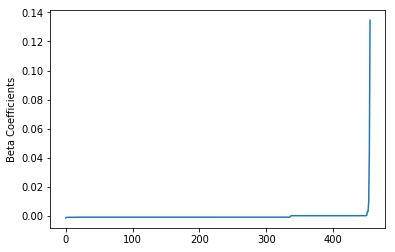

In [140]:
# Obtain the coefficients by using LogisticRegressionModel's attributes.
import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lrModel.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

# Show the graph. 
plt.show()

Obtain the receiver-operating characteristic and areaUnderROC

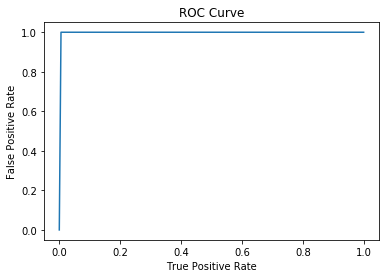

Training set areaUnderROC: 0.9971962616822431


In [141]:
# Get a summary of the data.
trainingSummary = lrModel.summary

# Convert the DataFrame to a Pandas DataFrame.
roc = trainingSummary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(roc['FPR'],roc['TPR'])

# Define the labels.
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

Precision and Recall

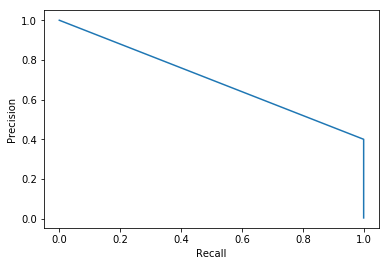

In [142]:
# Convert DataFrame to Pandas DataFrame.
pr = trainingSummary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])


# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

Set the model threshold to maximize F-Measure

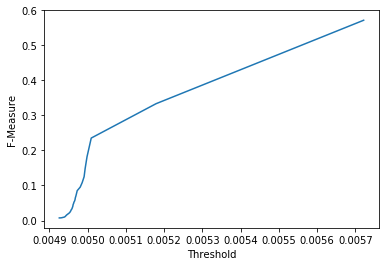

In [143]:
f = trainingSummary.fMeasureByThreshold.toPandas()
plt.plot(f['threshold'],f['F-Measure'])
plt.ylabel('F-Measure')
plt.xlabel('Threshold')
plt.show()

Evaluate the Logistic Regression model

In [144]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8917748917748918


In [145]:
evaluator.getMetricName()

'areaUnderROC'

Try tuning the model with the ParamGridBuilder and the CrossValidator.

In [146]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.5, 2.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [1, 5, 10])
             .build())

cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=5)

cvModel = cv.fit(train_data)
predictions = cvModel.transform(test_data)
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.5


In [147]:
evaluator.getMetricName()

'areaUnderROC'

# Decision Tree Classifier

In [148]:
from pyspark.ml.classification import DecisionTreeClassifier

In [149]:
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train_data)
predictions = dtModel.transform(test_data)
predictions.select('label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+-------------+----------+-----------+
|label|rawPrediction|prediction|probability|
+-----+-------------+----------+-----------+
|  0.0|  [529.0,0.0]|       0.0|  [1.0,0.0]|
|  0.0|  [529.0,0.0]|       0.0|  [1.0,0.0]|
|  0.0|  [529.0,0.0]|       0.0|  [1.0,0.0]|
|  0.0|  [529.0,0.0]|       0.0|  [1.0,0.0]|
|  0.0|  [529.0,0.0]|       0.0|  [1.0,0.0]|
|  0.0|  [529.0,0.0]|       0.0|  [1.0,0.0]|
|  0.0|  [529.0,0.0]|       0.0|  [1.0,0.0]|
|  0.0|  [529.0,0.0]|       0.0|  [1.0,0.0]|
|  0.0|  [529.0,0.0]|       0.0|  [1.0,0.0]|
|  0.0|  [529.0,0.0]|       0.0|  [1.0,0.0]|
+-----+-------------+----------+-----------+
only showing top 10 rows



Evaluate the Decision Tree model

In [150]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.49783549783549785


In [151]:
evaluator.getMetricName()

'areaUnderROC'

# Random Forest Classifier

In [152]:
from pyspark.ml.classification import RandomForestClassifier

In [153]:
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train_data)
predictions = rfModel.transform(test_data)
predictions.select('label', 'rawPrediction', 'prediction', 'probability').show(10)

+-----+--------------------+----------+--------------------+
|label|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|  0.0|[19.9873948995900...|       0.0|[0.99936974497950...|
|  0.0|[19.8716244251888...|       0.0|[0.99358122125944...|
|  0.0|[19.9873948995900...|       0.0|[0.99936974497950...|
|  0.0|[19.9549577585221...|       0.0|[0.99774788792610...|
|  0.0|[19.9549577585221...|       0.0|[0.99774788792610...|
|  0.0|[19.9549577585221...|       0.0|[0.99774788792610...|
|  0.0|[19.9549577585221...|       0.0|[0.99774788792610...|
|  0.0|[19.9549577585221...|       0.0|[0.99774788792610...|
|  0.0|[19.9939662837752...|       0.0|[0.99969831418876...|
|  0.0|[19.9820140925401...|       0.0|[0.99910070462700...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows



Evaluate the Random Forest Classifier

In [154]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8138528138528138


In [155]:
evaluator.getMetricName()

'areaUnderROC'

In [156]:
print(rf.explainParams())

cacheNodeIds: If false, the algorithm will pass trees to executors to match instances with nodes. If true, the algorithm will cache node IDs for each instance. Caching can speed up training of deeper trees. Users can set how often should the cache be checkpointed or disable it by setting checkpointInterval. (default: False)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. (default: 10)
featureSubsetStrategy: The number of features to consider for splits at each tree node. Supported options: auto, all, onethird, sqrt, log2, (0.0-1.0], [1-n]. (default: auto)
featuresCol: features column name. (default: features, current: features)
impurity: Criterion used for information gain calculation (case-insensitive). Supported options: entropy, gini (default: gini)
labelCol: label column name. (default: label, current: label)
maxBins: Max number of bins for discretizing continuous features.  Must 

In [158]:
df.write.csv('dataset.csv')